# Procesamiento en python acerca del Dataframe 3:
# Elenco y popularidad (Elenco.csv y popularidad.csv)

In [62]:
# Importar librerías necesarias

import pandas as pd
import numpy as np
import plotly as pl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msmo
from statistics import multimode, mean, median
import math

# Importar datos de los archivos .csv

In [63]:
df_elenco = pd.read_csv("..\\dataset\\elenco.csv", index_col=0)
df_popularidad = pd.read_csv("..\\dataset\\popularidad.csv", index_col=0)

In [64]:
df_elenco.head()

,title,total_actors
film_id,,
508,lambs cincinatti,15
87,boondock ballroom,13
146,chitty lock,13
188,crazy home,13
249,dracula crystal,13


In [65]:
df_popularidad.head()

,full_name,film_participations
actor_id,,
107,gina degeneres,42
102,walter torn,41
198,mary keitel,40
181,matthew carrey,39
23,sandra kilmer,37


In [66]:
df_popularidad.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 107 to 148
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   full_name            200 non-null    object
 1   film_participations  200 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 4.7+ KB


In [67]:
df_elenco.info()

<class 'pandas.core.frame.DataFrame'>
Index: 997 entries, 508 to 995
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         997 non-null    object
 1   total_actors  997 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 23.4+ KB


# Vemos que no hay valores nulos

In [68]:
df_elenco.isna().sum()

title           0
total_actors    0
dtype: int64

In [69]:
df_popularidad.isna().sum()

full_name              0
film_participations    0
dtype: int64

# Creamos copias de los datasets

In [70]:
df_popularidad_copy = df_popularidad.copy()
df_elenco_copy = df_elenco.copy()

# Detectar outliers

# Columna total_actors del archivo elenco.csv

# Calculamos límites y percentiles

In [71]:
# Cálculo de límites
Q1 = df_elenco_copy['total_actors'].quantile(0.25)
Q3 = df_elenco_copy['total_actors'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Generamos el gráfico

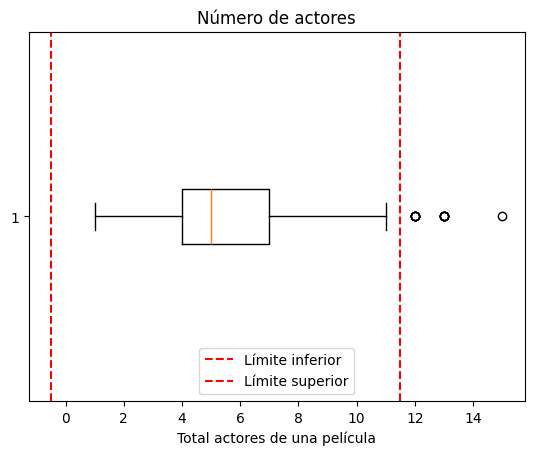

In [72]:
# Boxplot horizontal
plt.boxplot(df_elenco_copy['total_actors'], vert=False)

# Líneas de límite inferior y superior
plt.axvline(lower_bound, color='red', linestyle='--', label='Límite inferior')
plt.axvline(upper_bound, color='red', linestyle='--', label='Límite superior')

plt.xlabel("Total actores de una película")
plt.title("Número de actores")
plt.legend()
plt.show()

##### En la inspección de los datos se identificaron algunos valores atípicos (outliers) que superan el límite superior establecido por los criterios estadísticos habituales. La presencia de estos outliers podría estar asociada a títulos con mayor reconocimiento, producciones con presupuestos superiores o proyectos con directores y guionistas de renombre, factores que suelen atraer mayor interés y participación de actores.

##### A pesar de su magnitud, estos valores extremos no representan un problema significativo para el conjunto del dataset. Su número es reducido y no altera de forma sustancial las tendencias generales ni afecta de manera notable a las medidas de tendencia central (media, mediana). Por lo tanto, se consideran datos válidos y coherentes con la realidad del dominio, y no se justifican acciones como su eliminación o ajuste.

# Columna film_participations del archivo popularidad.csv

# Calculamos límites y percentiles

In [73]:
# Cálculo de límites
Q1 = df_popularidad_copy['film_participations'].quantile(0.25)
Q3 = df_popularidad_copy['film_participations'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

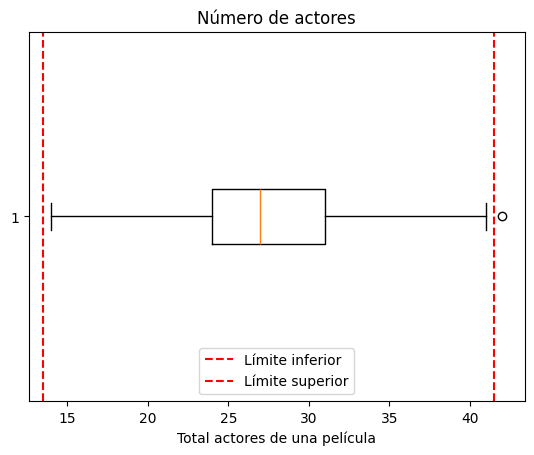

In [74]:
# Boxplot horizontal
plt.boxplot(df_popularidad_copy['film_participations'], vert=False)

# Líneas de límite inferior y superior
plt.axvline(lower_bound, color='red', linestyle='--', label='Límite inferior')
plt.axvline(upper_bound, color='red', linestyle='--', label='Límite superior')

plt.xlabel("Total actores de una película")
plt.title("Número de actores")
plt.legend()
plt.show()

##### Los datos se encuentran mayoritariamente dentro del rango esperado, con la excepción de un único valor que supera ligeramente el límite superior —solo por 1 o 2 unidades respecto al resto— en cuanto al número de películas en las que ha participado. Esta desviación mínima no representa un outlier preocupante ni implica un impacto significativo en la distribución general.

##### Dado que el resto de observaciones se concentran alrededor de la media y presentan una variabilidad reducida, este valor ligeramente elevado no introduce sesgos ni altera de forma relevante las métricas descriptivas. En consecuencia, puede considerarse como una variación natural dentro del comportamiento del conjunto de datos y no requiere acciones correctivas.